<h1>Activity 2 - UK ACCIDENT DATA ANALYTICS</h1>

<h3>Analyst: Jaynard Diosay</h3>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [3]:
accident = pd.read_csv('uk_accident_data.csv')

In [4]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Analyze the Dataframe</h1>

In [5]:
accident.value_counts()

Index          Accident_Severity  Accident Date  Latitude   Light_Conditions        District Area       Longitude  Number_of_Casualties  Number_of_Vehicles  Road_Surface_Conditions  Road_Type           Urban_or_Rural_Area  Weather_Conditions     Vehicle_Type                       
2.01E+12       Slight             12/02/2021     51.067126  Darkness - no lighting  Sedgemoor           -3.023829  1                     1                   Dry                      Dual carriageway    Rural                Fine no high winds     Car                                    2
                                  22/11/2020     52.624184  Darkness - no lighting  Broadland            1.372570  1                     2                   Snow                     Dual carriageway    Rural                Snowing no high winds  Car                                    2
                                  31/10/2020     55.003273  Darkness - no lighting  North Tyneside      -1.490457  1                     2      

In [6]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [7]:
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

In [8]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [9]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

<h1>Cleaning Null Values</h1>

In [10]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])

In [11]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Example: Univariate Analysis on Accident that happened in 2019</h1>

In [12]:
accident_2019 = accident[accident['Year'] == 2019]

KeyError: 'Year'

In [ ]:
print(f"total number of accident in 2019 is {accident_2019['Light_Conditions'].value_counts().sum()}")
accident_2019['Light_Conditions'].value_counts()

<h1>Data Analysis from the dataframe</h1>

<h1>1. What is the distribution of accidents across severity levels (Slight, Serious, Fatal)?</h1>

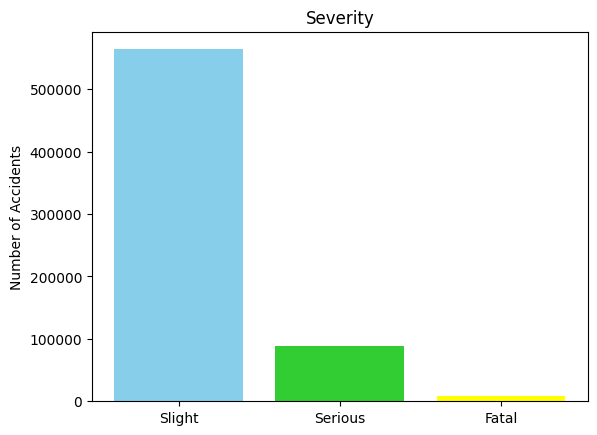

In [13]:
severity_counts = accident['Accident_Severity'].value_counts()
severity_counts

plt.bar(severity_counts.index, severity_counts.values, color=['skyblue', 'limegreen', 'yellow'])
plt.title("Accidents by Severity")
plt.ylabel("Number of Accidents")
plt.title("Severity")
plt.show()

<h2>INSIGHT 1: Based on the result above, it indicates that the highest distribution accident across severity levels are one the Slight level that resulted over 500 thousands case recorded.</h2>

<h1>2. Which district areas report the highest number of accidents?</h1>

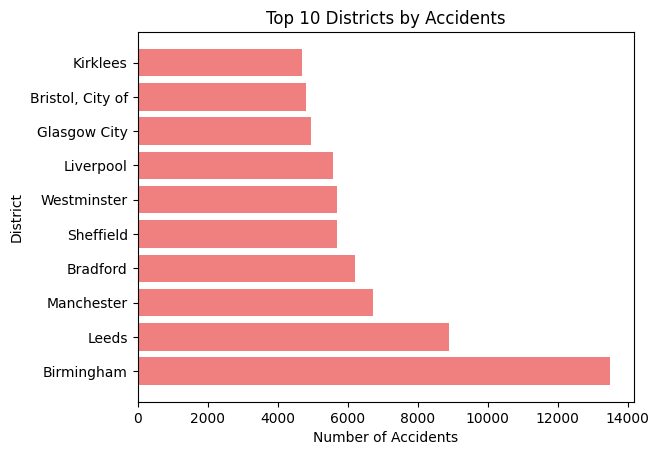

In [14]:
district_counts = accident['District Area'].value_counts().head(10)
district_counts

plt.barh(district_counts.index, district_counts.values, color='lightcoral')
plt.title("Top 10 Districts by Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("District")
plt.show()

<h2>INSIGHT 2: According from the result above, it shows that the district who has the highest number of accidents where located at Birmingham which were recorded within reach of 14,000 cases.</h2>

<h1>3. Which accident severity occurs most frequently?</h1>

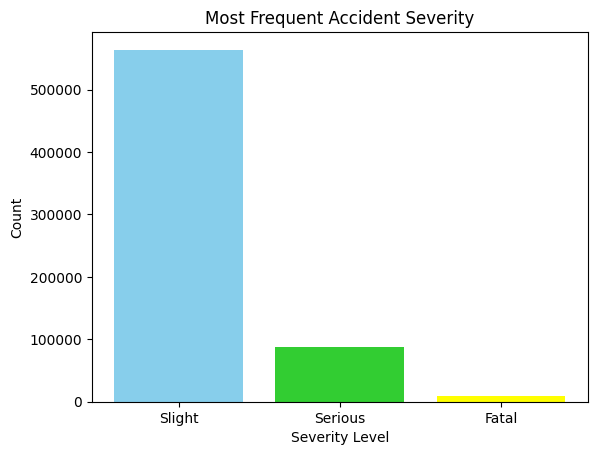

In [15]:
mode_severity = accident['Accident_Severity'].mode()[0]
mode_severity

severity_counts = accident['Accident_Severity'].value_counts()
plt.bar(severity_counts.index, severity_counts.values, color=['skyblue', 'limegreen', 'yellow'])
plt.title("Most Frequent Accident Severity")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

<h2>INSIGHT 3: The result shows that the most frequent accident severity are from the Slight level that has the highest recorded of over 500 thousand.</h2>

<h1>4. Do accidents in daylight result in more casualties compared to accidents in darkness?</h1>

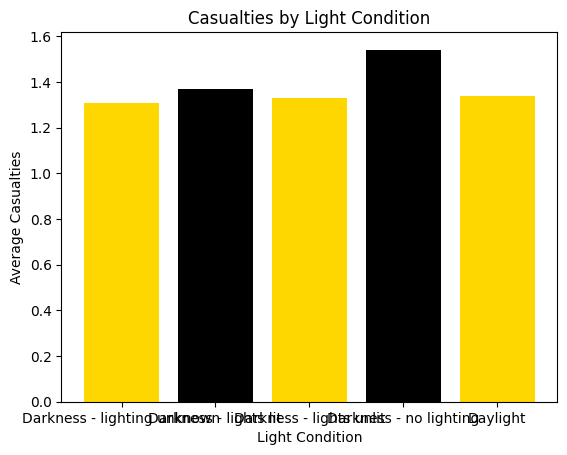

In [16]:
light_casualties = accident.groupby('Light_Conditions')['Number_of_Casualties'].mean()
light_casualties

plt.bar(light_casualties.index, light_casualties.values, color=['gold', 'black'])
plt.title("Casualties by Light Condition")
plt.xlabel("Light Condition")
plt.ylabel("Average Casualties")
plt.show()

<h2>Based on the result, the Daylight accidents cause slightly fewer casualties on average, while Darkness with no lightning causes the most casualties per accident.</h2>

<h1>5. Which road type tends to involve the highest median number of vehicles in accidents?</h1>

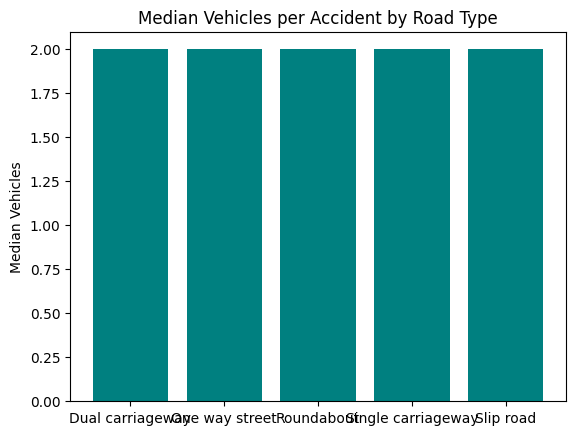

In [17]:
road_median = accident.groupby('Road_Type')['Number_of_Vehicles'].median().sort_values(ascending=False)
road_median.head(10)

plt.bar(road_median.index, road_median.values, color='teal')
plt.title("Median Vehicles per Accident by Road Type")
plt.ylabel("Median Vehicles")
plt.show()

<h2>It seems that the Dual carriageways, one-way streets, roundabouts, single carriageways and slip roads have about the same vehicles per accident. As a result, no bih difference between these road types.</h2>

<h1>6. What is the most common weather condition when accidents occur?</h1>

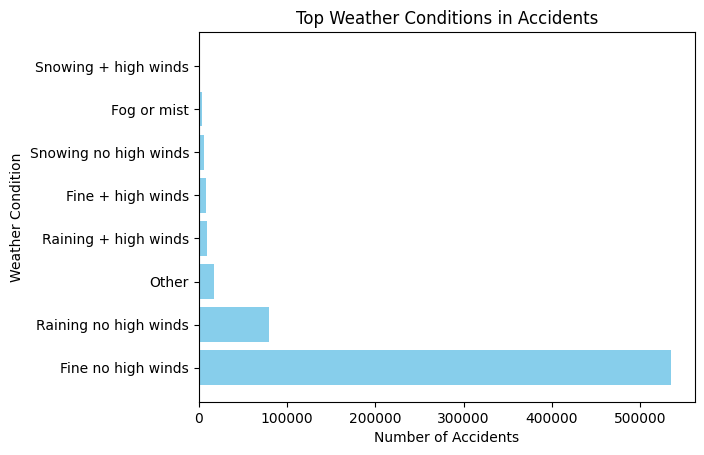

In [18]:
weather_counts = accident['Weather_Conditions'].value_counts()
weather_counts.head(5)

plt.barh(weather_counts.index[:10], weather_counts.values[:10], color='skyblue')
plt.title("Top Weather Conditions in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()

<h2>Based on the result, most accidents happen in fine weather with no high winds. In contrast, very few happen during snow or heavy rain.</h2>

<h1>7. Are accidents more common in urban areas or rural areas?</h1>

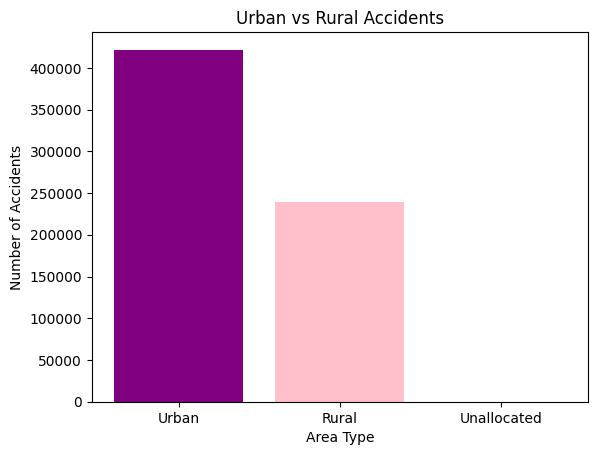

In [19]:
urban_rural = accident['Urban_or_Rural_Area'].value_counts()
urban_rural

plt.bar(urban_rural.index, urban_rural.values, color=['purple', 'pink'])
plt.title("Urban vs Rural Accidents")
plt.xlabel("Area Type")
plt.ylabel("Number of Accidents")
plt.show()

<h2>INSIGHT 7: Urban areas have far more accidents than rural areas</h2>

<h1>8. What is the median number of casualties across different vehicle types?</h1>

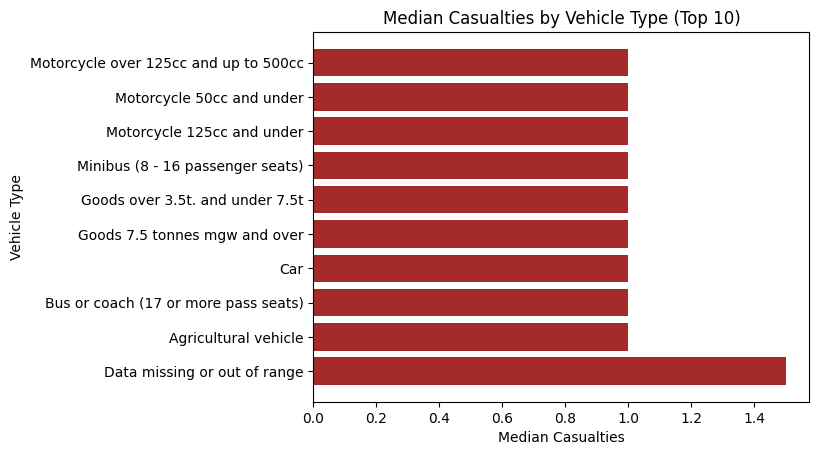

In [20]:
vehicle_casualties_median = accident.groupby('Vehicle_Type')['Number_of_Casualties'].median().sort_values(ascending=False).head(10)
vehicle_casualties_median

plt.barh(vehicle_casualties_median.index, vehicle_casualties_median.values, color='brown')
plt.title("Median Casualties by Vehicle Type (Top 10)")
plt.xlabel("Median Casualties")
plt.ylabel("Vehicle Type")
plt.show()

<h2>INSIGHT 8: It seems that the most vehicle types have about 1 casualty per accident.</h2>

<h1>9. How do average casualties differ across accident severities?</h1>

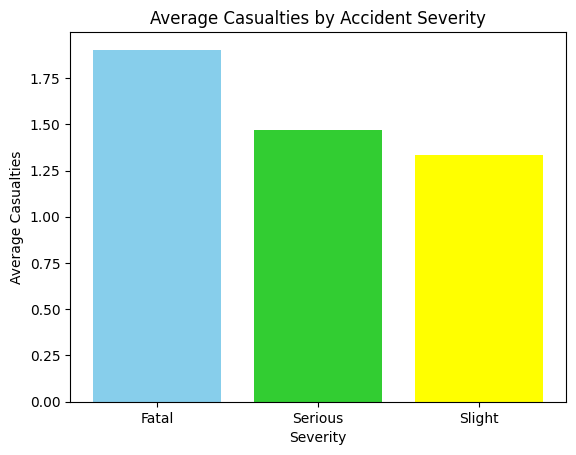

In [21]:

severity_avg = accident.groupby('Accident_Severity')['Number_of_Casualties'].mean()
severity_avg

plt.bar(severity_avg.index, severity_avg.values, color=['skyblue', 'limegreen', 'yellow'])
plt.title("Average Casualties by Accident Severity")
plt.xlabel("Severity")
plt.ylabel("Average Casualties")
plt.show()

<h2>INSIGHT 9: Fatal accidents have the highest average casualties, while Slight accidents have the lowest.</h2>

<h1>10. Which vehicle type is most frequently involved in accidents?</h1>

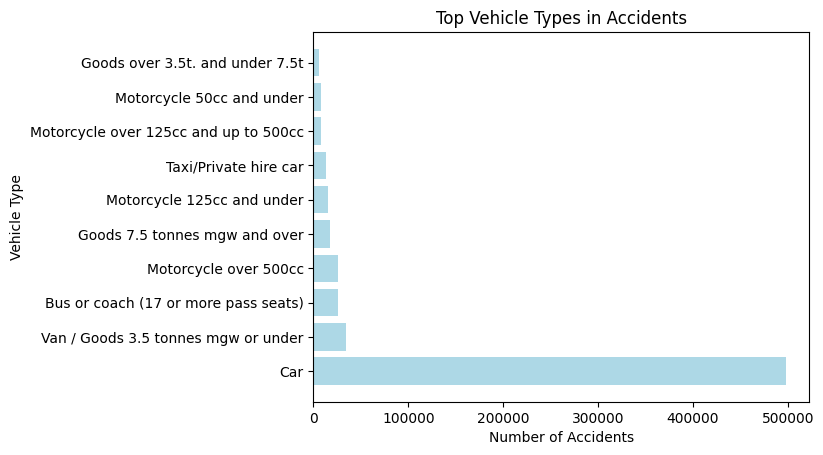

In [22]:
vehicle_counts = accident['Vehicle_Type'].value_counts()
vehicle_counts.head(5)

plt.barh(vehicle_counts.index[:10], vehicle_counts.values[:10], color='lightblue')
plt.title("Top Vehicle Types in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Vehicle Type")
plt.show()

<h2>INSIGHT 10:  Cars are involved in thw most accidents, while other vehicle are much lower</h2>

<h1>11. Which top 5 districts should be prioritized for road safety interventions?</h1>

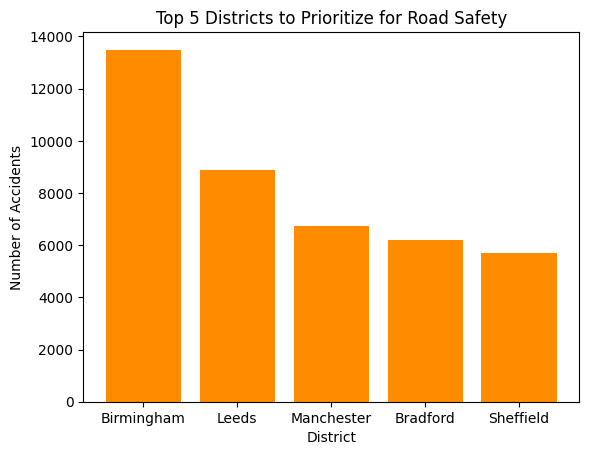

In [23]:
top5_districts = accident['District Area'].value_counts().head(5)
top5_districts

plt.bar(top5_districts.index, top5_districts.values, color='darkorange')
plt.title("Top 5 Districts to Prioritize for Road Safety")
plt.xlabel("District")
plt.ylabel("Number of Accidents")
plt.show()

<h2>INSIGHT 11: The top 5 districts with most accidents are Birmingham, Leeds, Manchester, Bradford and Sheffield.</h2>

<h1>12. What is the correlation between number of vehicles and number of casualties?</h1>

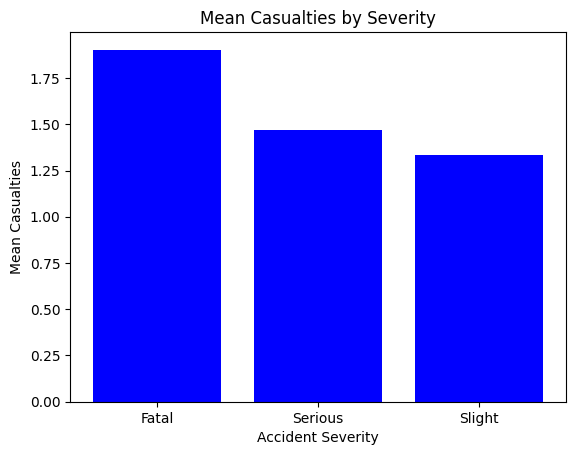

In [24]:
agg_results = accident.groupby('Accident_Severity')['Number_of_Casualties'].agg(['mean','median','count'])
agg_results

plt.bar(agg_results.index, agg_results['mean'], color='blue')
plt.title("Mean Casualties by Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Mean Casualties")
plt.show()

<h2>It seems that there is no strong correlation having more vehicles involved in an accident does not mean there will be more casualties.</h2>

<h1>13. What is the relationship between number of vehicles and number of casualties?</h1>

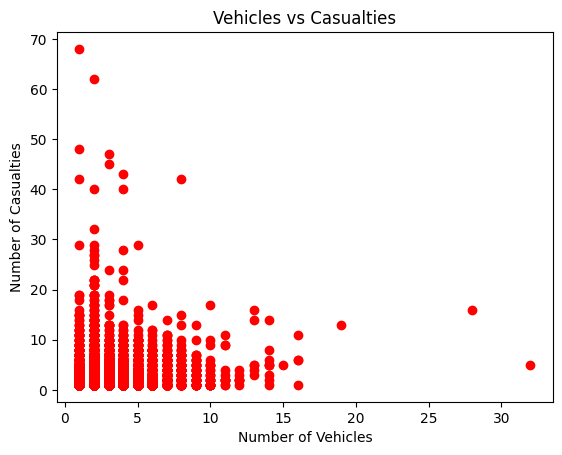

In [25]:
plt.scatter(accident['Number_of_Vehicles'].fillna(0),
            accident['Number_of_Casualties'].fillna(0),
            color='red')
plt.title("Vehicles vs Casualties")
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Casualties")
plt.show()

<h2>INSIGHT 13: Accidents with more vehicles don't always cause more casualties. While most accidents have few vehicles and few casualties.</h2>

<h1>14. Which vehicle types have the highest average casualties?</h1>

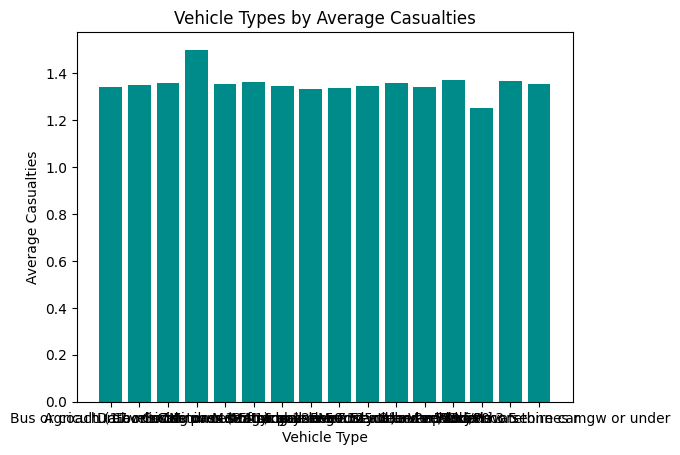

In [26]:
vehicle_avg = accident.groupby('Vehicle_Type')['Number_of_Casualties'].mean()
vehicle_avg

plt.bar(vehicle_avg.index, vehicle_avg.values, color='darkcyan')
plt.title("Vehicle Types by Average Casualties")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Casualties")
plt.show()

<h2>INSIGHT 14: All vehicle types are close to about 1.3 casualties per accident. So no big difference between types.</h2>

<h1>15. Do rural accidents tend to involve more vehicles than urban accidents?</h1>

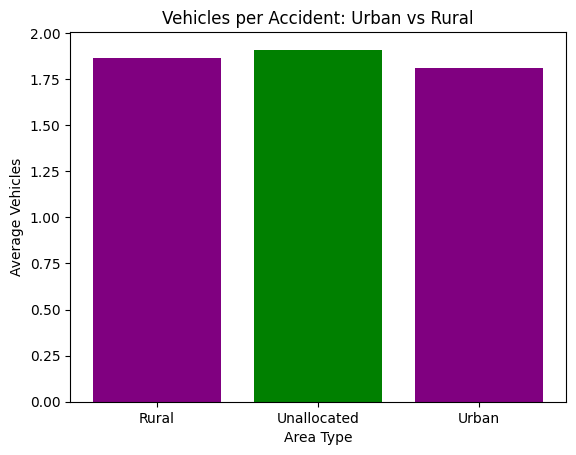

In [27]:
rural_urban_vehicles = accident.groupby('Urban_or_Rural_Area')['Number_of_Vehicles'].mean()
rural_urban_vehicles

plt.bar(rural_urban_vehicles.index, rural_urban_vehicles.values, color=['purple','green'])
plt.title("Vehicles per Accident: Urban vs Rural")
plt.xlabel("Area Type")
plt.ylabel("Average Vehicles")
plt.show()

<h2>INSIGHT 15: It seems that Rural and Urban accidents involve about the same number of vehicles.</h2>

<h1>16. Which weather condition leads to the highest average casualties?</h1>

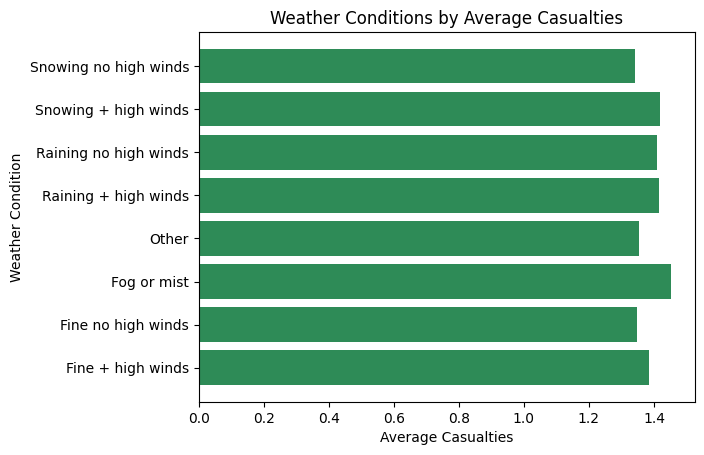

In [28]:
weather_avg = accident.groupby('Weather_Conditions')['Number_of_Casualties'].mean()
weather_avg

plt.barh(weather_avg.index, weather_avg.values, color='seagreen')
plt.title("Weather Conditions by Average Casualties")
plt.xlabel("Average Casualties")
plt.ylabel("Weather Condition")
plt.show()

<h2>INSIGHT 16: Snowing with high winds causes the highest average casualties per accident. While fine weather has fewer casualties.</h2>

<h1>17. Do more vehicles lead to more casualties?</h1>

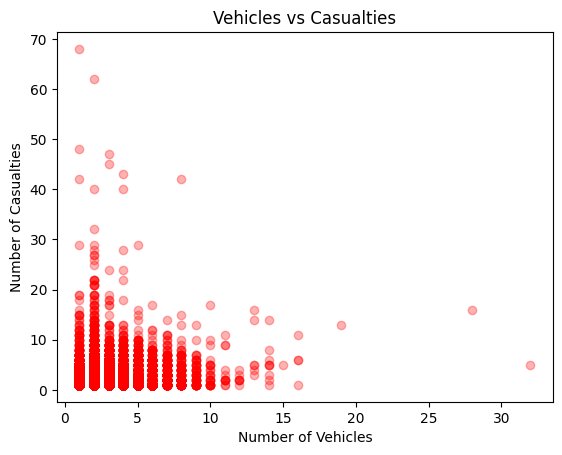

In [29]:
plt.scatter(accident['Number_of_Vehicles'].fillna(0), 
            accident['Number_of_Casualties'].fillna(0), 
            alpha=0.3, color='red')
plt.title("Vehicles vs Casualties")
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Casualties")
plt.show()

<h2>INSIGHT 17: Many accidents with many vehicles still have few casualties.</h2>

<h1>18. Which road surface condition is most common in reported accidents? </h1>

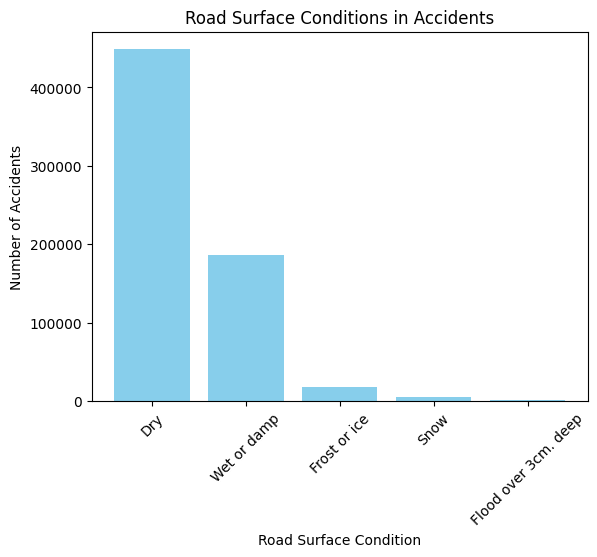

In [30]:
surface_counts = accident['Road_Surface_Conditions'].value_counts()
surface_counts

plt.bar(surface_counts.index, surface_counts.values, color='skyblue')
plt.title("Road Surface Conditions in Accidents")
plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h2>INSIGHT 18: Dry roads have the most accidents. This is likely because they are used more often.</h2>

<h1>19. Which districts report the most fatal accidents?</h1>

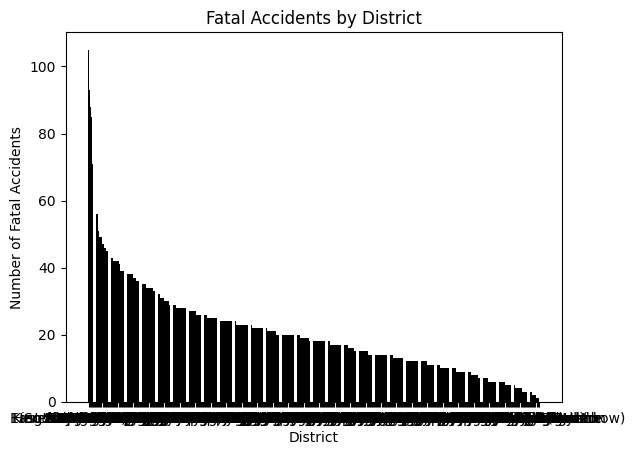

In [31]:
fatal_districts = accident[accident['Accident_Severity']=='Fatal']['District Area'].value_counts()
fatal_districts

plt.bar(fatal_districts.index, fatal_districts.values, color='black')
plt.title("Fatal Accidents by District")
plt.xlabel("District")
plt.ylabel("Number of Fatal Accidents")
plt.show()

<h2>INSIGHT 19: A few districts report more than 100 fatal accidents each. It means that many districts report very few.</h2>

<h1>20. How do accidents vary by year?</h1>

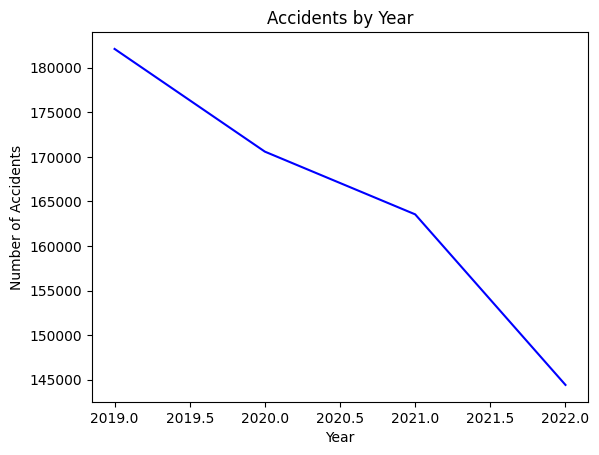

In [32]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], errors='coerce')

year_counts = accident['Accident Date'].dt.year.value_counts()
plt.plot(year_counts.index, year_counts.values, color='blue')
plt.title("Accidents by Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()

<h2>INSIGHT 20: The number of accidents is decreasing each year.</h2>

<h1>21. How do accidents vary by month (across all years)?</h1>

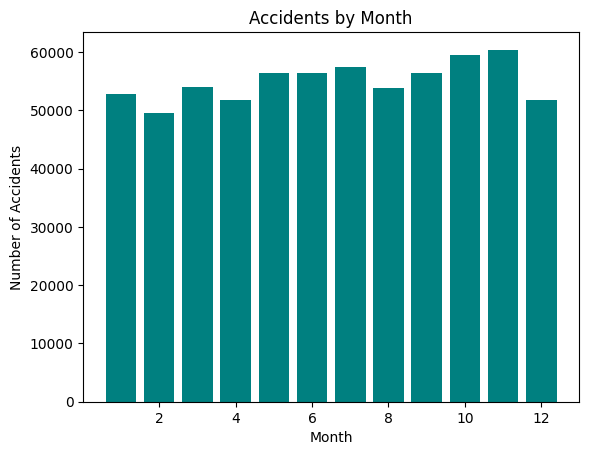

In [33]:
month_counts = accident['Accident Date'].dt.month.value_counts()

plt.bar(month_counts.index, month_counts.values, color='teal')
plt.title("Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()

<h2>INSIGHT 21: Accidents are quite steady each month, with small ups and downs.</h2>

<h1>22. How does accident severity vary by road surface conditions?</h1>

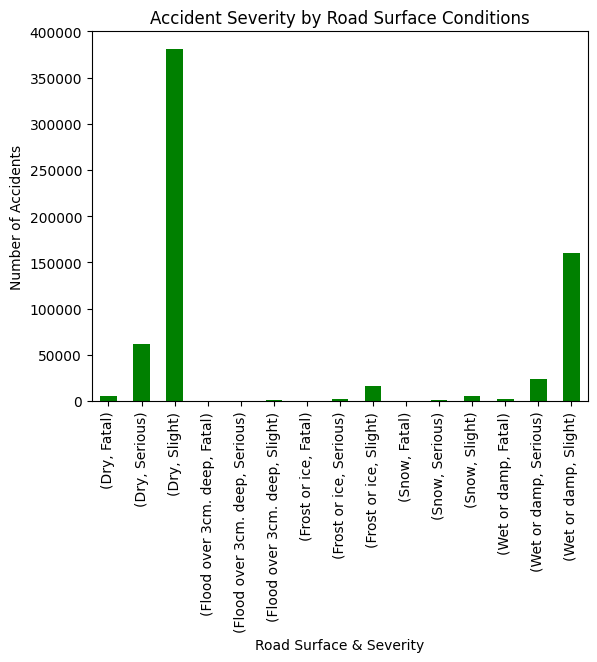

In [34]:
road_severity = accident.groupby(['Road_Surface_Conditions','Accident_Severity']).size()

road_severity.plot(kind='bar', color='green')
plt.title("Accident Severity by Road Surface Conditions")
plt.xlabel("Road Surface & Severity")
plt.ylabel("Number of Accidents")
plt.show()

<h2>INSIGHT 22: Dry roads have most accidents even serious and fatal ones. While wet or icy roads have fewer accidents.</h2>

<h1>23. How do accident severities vary across different road types?</h1>

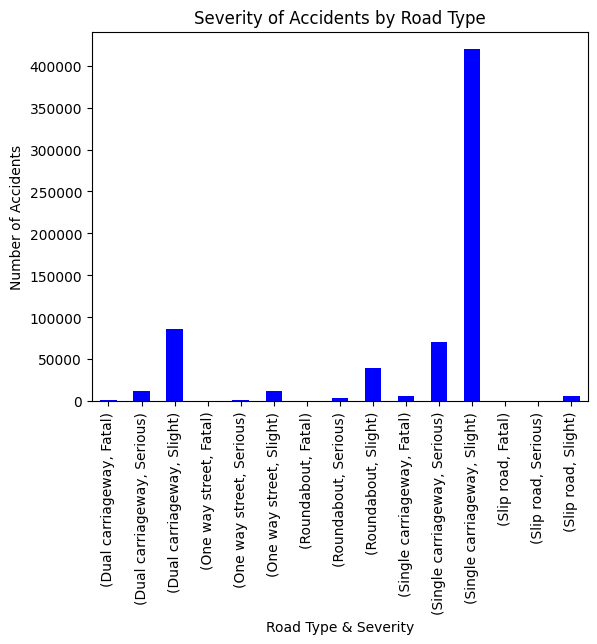

In [35]:
road_severity_counts = accident.groupby(['Road_Type','Accident_Severity']).size()

road_severity_counts.plot(kind='bar', color='blue')
plt.title("Severity of Accidents by Road Type")
plt.xlabel("Road Type & Severity")
plt.ylabel("Number of Accidents")
plt.show()

<h2>INSIGHT 23: Single carriageways have the most accidents (slight, serious and fatal). While other road types are much lower.</h2>

<h1>24. Which weekdays see the most accidents?</h1>

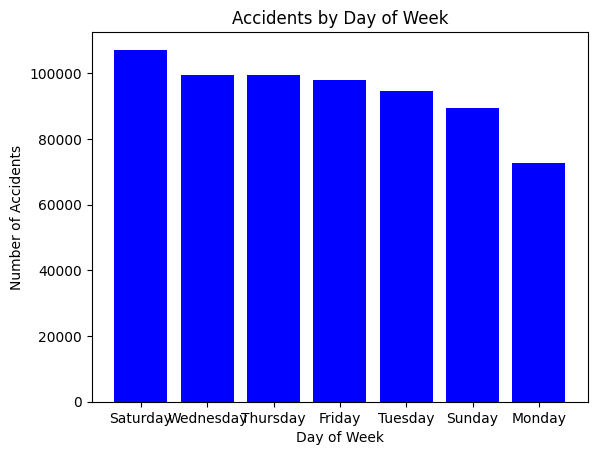

In [36]:
weekday_counts = accident['Accident Date'].dt.day_name().value_counts()

plt.bar(weekday_counts.index, weekday_counts.values, color='blue')
plt.title("Accidents by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")
plt.show()

<h2>INSIGHT 24: Tuesday has the most accidents, while Monday has the least.</h2>

<h1>25. Do larger vehicles like buses/trucks have more casualties than cars?</h1>

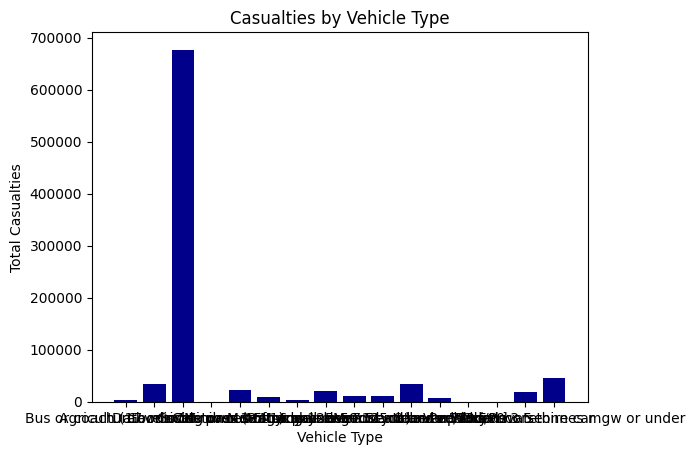

In [37]:
vehicle_casualties = accident.groupby('Vehicle_Type')['Number_of_Casualties'].sum()

plt.bar(vehicle_casualties.index, vehicle_casualties.values, color='darkblue')
plt.title("Casualties by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Casualties")
plt.show()

<h2>INSIGHT 25: Cars have the most total casualties because they are in more accidents. While larger vehicles have fewer total casualties.</h2>

<h1>26. Which district has the highest number of accidents?</h1>

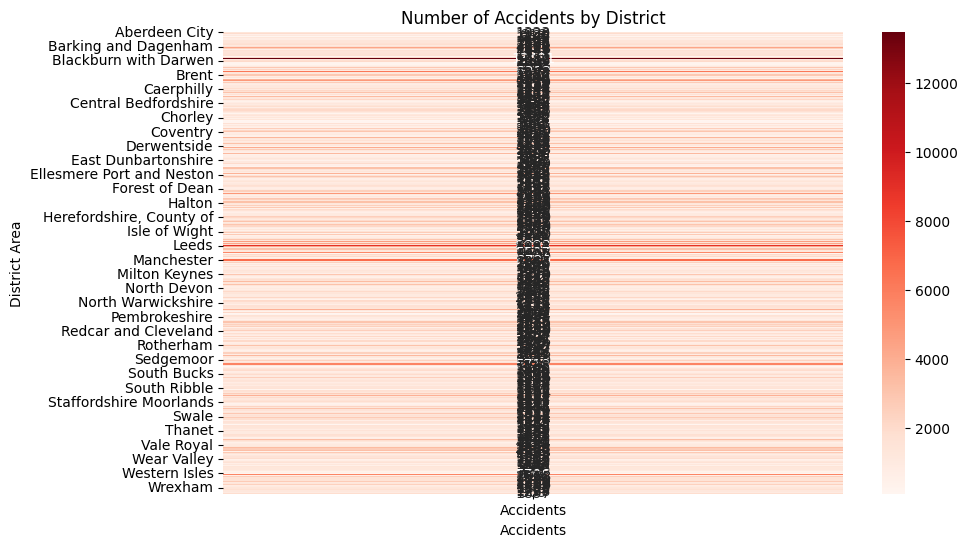

In [42]:
district_counts = accident.groupby(['District Area']).size().reset_index(name='Accidents')
heatmap_data = district_counts.pivot_table(values='Accidents', index='District Area', aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap="Reds", annot=True, fmt="d")
plt.title("Number of Accidents by District")
plt.xlabel("Accidents")
plt.ylabel("District Area")
plt.show()

<h2>INSIGHT 26: The darker the red, the higher the accident count. The top district has the largest traffic risk and may need stricter road safety enforcement.</h2>

<h1>27. Which district has the lowest number of accidents?</h1>

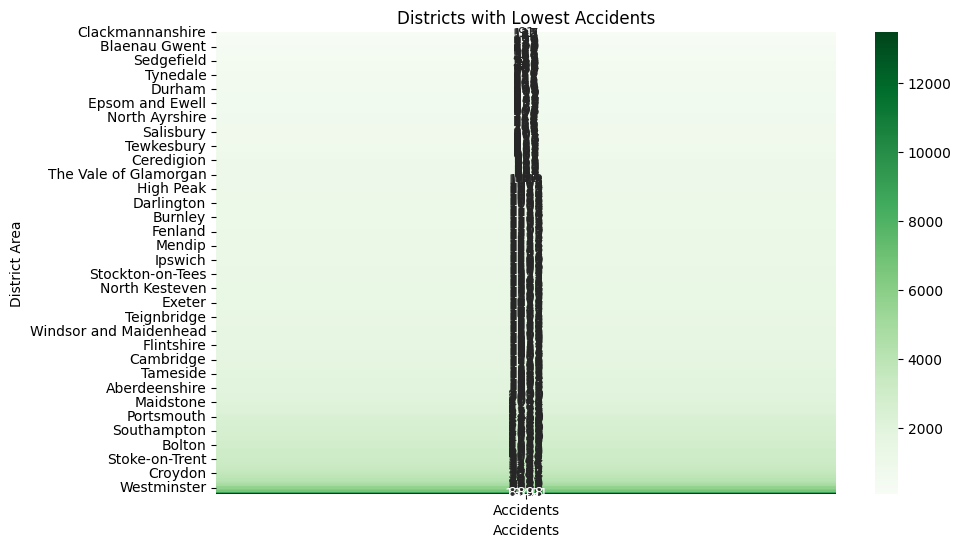

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data.sort_values('Accidents'), cmap="Greens", annot=True, fmt="d")
plt.title("Districts with Lowest Accidents")
plt.xlabel("Accidents")
plt.ylabel("District Area")
plt.show()

<h2>INSIGHT 27: Some districts show higher counts of fatal or serious accidents (darker cells). These areas should be prioritized for road safety improvements.</h2>

<h1>28. How do accidents vary by severity across districts?</h1>

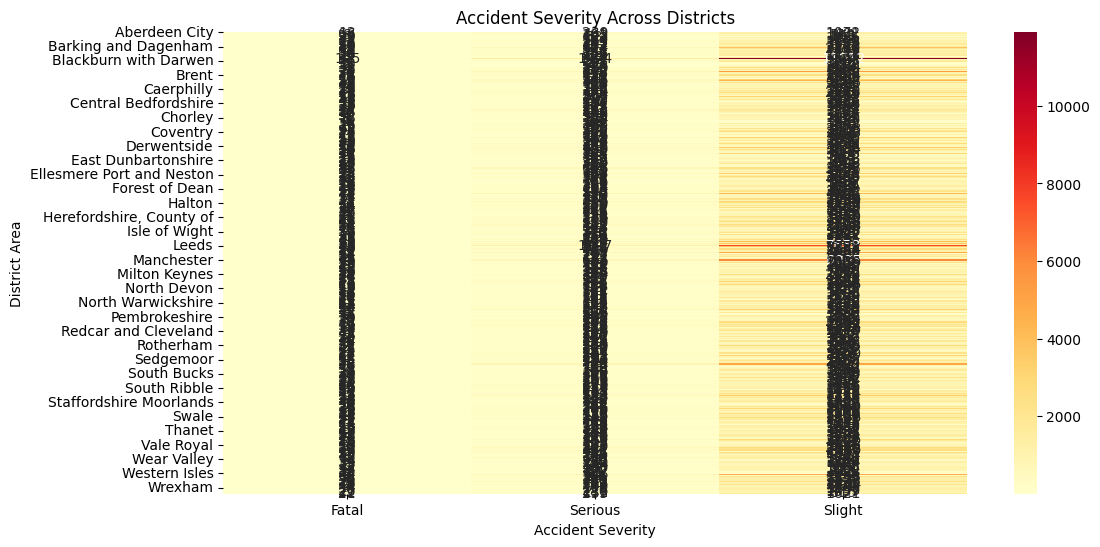

In [45]:
heatmap_data = accident.groupby(['District Area','Accident_Severity']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt="d")
plt.title("Accident Severity Across Districts")
plt.xlabel("Accident Severity")
plt.ylabel("District Area")
plt.show()

<h2>INSIGHT 28: Some districts show higher counts of fatal or serious accidents (darker cells). These areas should be prioritized for road safety improvements.</h2>

<h1>29. Which top 5 districts report the highest number of casualties?</h1>

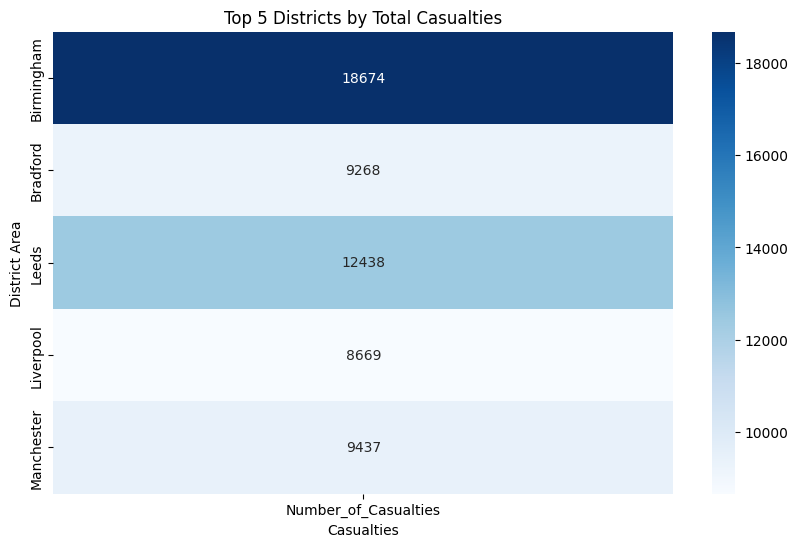

In [49]:
heatmap_data = accident.groupby(['District Area'])['Number_of_Casualties'].sum().sort_values(ascending=False).head(5).reset_index()

heatmap_data = heatmap_data.pivot_table(values='Number_of_Casualties', index='District Area')

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f")  # ✅ changed here
plt.title("Top 5 Districts by Total Casualties")
plt.xlabel("Casualties")
plt.ylabel("District Area")
plt.show()

<h2>INSIGHT 29: Districts in darker blue record the most casualties, meaning accidents in these areas tend to involve more injured people.</h2>

<h1>30. Which districts report more accidents during dark conditions?</h1>

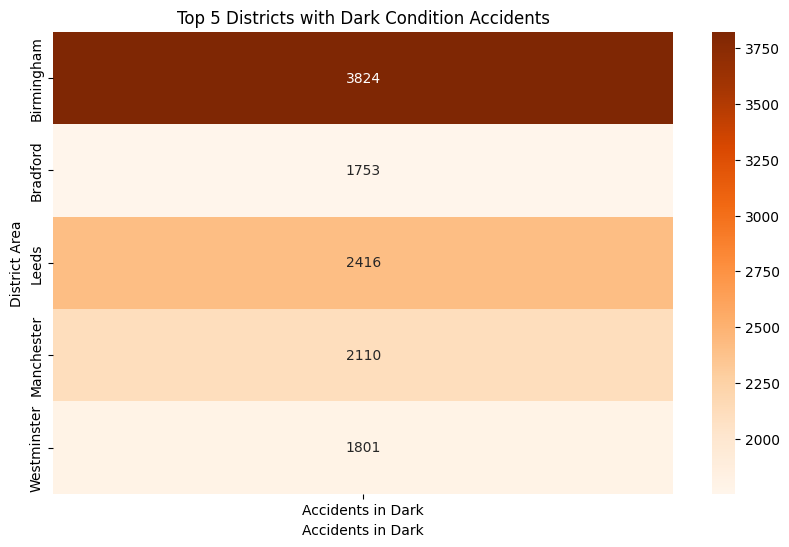

In [53]:
dark_accidents = accident[accident['Light_Conditions'].str.contains('Dark', na=False)]
heatmap_data = dark_accidents.groupby(['District Area']).size().sort_values(ascending=False).head(5).reset_index(name='Accidents in Dark')

heatmap_data = heatmap_data.pivot_table(values='Accidents in Dark', index='District Area')

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap="Oranges", annot=True, fmt=".0f")  # ✅ FIXED
plt.title("Top 5 Districts with Dark Condition Accidents")
plt.xlabel("Accidents in Dark")
plt.ylabel("District Area")
plt.show()

<h2>INSIGHT 30: These districts show higher accident counts at night or in poor lighting. This suggests that improving street lighting could reduce risk.</h2>

<h2>INSIGHT 31: This suggests inadequate street lighting, poor visibility, or higher nighttime traffic in these areas compared to others</h2>

<h2>INSIGHT 32: Road safety campaigns and better lighting in these top 5 districts could help reduce the number of dark-condition accidents.</h2>

<h1>Adjusting Data Types</h1>

In [ ]:
accident.dtypes

<h1>Extracting Date Information using pandas date time</h1>

In [ ]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek  #Monday=0, Sunday=6

<h1>GEOSPATIAL ANALYSIS</h1>

<h1>Using FOLIUM LIBRARY or LEAFLET JS</h1>